In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')

In [6]:
import os
files=[file for file in os.listdir('./Sales_Data')]

for i in files:
    print(i)






Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [16]:
files=[file for file in os.listdir('./Sales_Data')]
combined_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    combined_data=pd.concat([combined_data,df])
    
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Droping Null Values

In [14]:
nan_df=combined_data[combined_data.isnull().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
combined_data=combined_data.dropna(how='any')
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Cleaning data

In [24]:
combined_data=combined_data[combined_data['Order Date'].str[:2]!='Or']

In [25]:
#Adding Months
combined_data['month']=combined_data['Order Date'].str[:2].astype('int32')

In [26]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [30]:
#Converting column types to numeric
combined_data['Quantity Ordered']=pd.to_numeric(combined_data['Quantity Ordered'])
combined_data['Price Each']=pd.to_numeric(combined_data['Price Each'])

#Creating sales column
combined_data['Sales']=combined_data['Quantity Ordered']*combined_data['Price Each']

In [31]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Best Month for sales?

In [34]:

fr=combined_data.groupby('month')['Sales'].sum().sort_values(ascending=False)
fr
#December had the highest sales while January had the lowest.

month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

In [44]:
tr=combined_data.groupby('month').sum()
tr

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


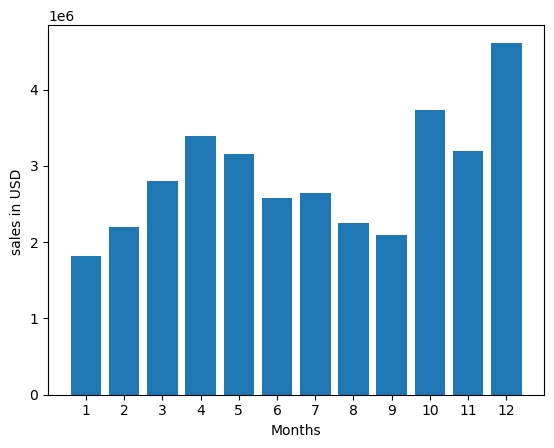

In [48]:
import matplotlib.pyplot as plt
x=range(1,13)
plt.bar(x,tr['Sales'])
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('sales in USD ')
plt.show()


In [49]:
def city(x):
    l=x.split(',')
    return (l[1])
combined_data['city']=combined_data['Purchase Address'].apply(city)

In [50]:
combined_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## Which city had the highest number pf sales?

In [52]:
combined_data.groupby('city').sum()['Sales'].sort_values(ascending=False)
#San Francisco

city
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Sales, dtype: float64

In [57]:
## Getting states
combined_data['state']=combined_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])


In [58]:
combined_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [59]:
combined_data.groupby('state').sum()['Sales'].sort_values(ascending=False)

state
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Sales, dtype: float64

# Best time to display ADs to maximize likelihood of customer's buying product?

In [60]:
combined_data['Order Date']=pd.to_datetime(combined_data['Order Date'])

In [62]:
combined_data['Hour']=combined_data['Order Date'].dt.hour

In [63]:
combined_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,state,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9


In [65]:
combined_data.groupby('Hour').sum()['Sales'].sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

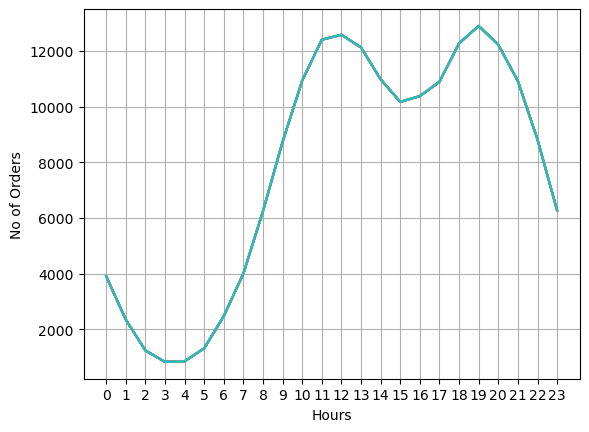

In [69]:
hours=[hour for hour,df in combined_data.groupby('Hour')]
plt.plot(hours,combined_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("No of Orders")
plt.grid()
plt.show()

In [ ]:
## My recommendation is betwen 11am To 1pm and around 7pm.

# What products are most often sold together?


In [73]:
df=combined_data[combined_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df=df[['Order ID','grouped']].drop_duplicates()
df

C:\Users\Shajo\AppData\Local\Temp\ipykernel_20756\1733698498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [76]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)
## 'iPhone', 'Lightning Charging Cable' the most sold combinations

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Which product was sold the most and the reason behind it?

In [83]:
a1=combined_data.groupby('Product')
a2=a1.sum()['Quantity Ordered']
a2


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [81]:
combined_data.groupby('Product')['Quantity Ordered'].count()

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

In [ ]:
### USB-C Charging Cable and Lightning Charging Cable  because they are cheap and high demand products